# Pymaceuticals Inc.
---

### Analysis

- Capomulin demonstrated promising results in reducing tumor volumes compared to other regimens.
- The drug's efficacy was evident in both summary statistics and visualizations.
- Correlation analysis suggested a strong positive relationship between mouse weight and average tumor volume, emphasizing the need for weight considerations in evaluating treatment outcomes.
Recommendations:
- Based on the study results, further investigation and clinical trials with Capomulin are recommended for potential SCC treatment.
Additional analyses and research may be needed to understand the long-term effects and safety profile of Capomulin.
 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for previous
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [158]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df[merge_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [111]:
# Optional: Get all the data for the duplicate mouse ID
filter = merge_df['Mouse ID'] == 'g989'
g989_df = merge_df.loc[filter, :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = "g989"
clean_df = merge_df[merge_df["Mouse ID"]!=mouse_to_drop]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [160]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_df['Mouse ID'].nunique()
unique_mice 



248

In [161]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
clean_df = merge_df.set_index('Mouse ID')
clean_df.loc['g989']



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [115]:
# Checked that the rows have decreased by 13 (the number of rows for mouse 'g989')
# Used .shape to check the rows/columns in the clean_df
clean_df.drop(["g989"])
clean_df.shape

(1893, 7)

In [162]:
# Created a dataframe that reset the index 'Mouse ID' as a column just in case we need it later.
# Used .reset_index()
clean_df = clean_df.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor = clean_df.groupby(['Drug Regimen'])

tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumor_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor2 = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

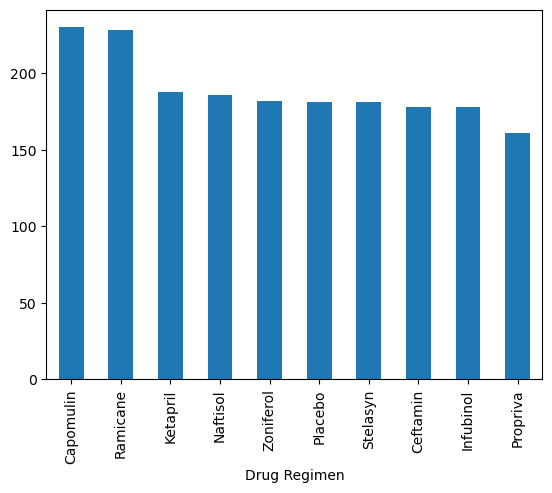

In [131]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint
# plot a bar chart using .plot.bar() and assorted the values so they are in descending order
timepoint.sort_values(ascending=False).plot.bar()
plt.show()

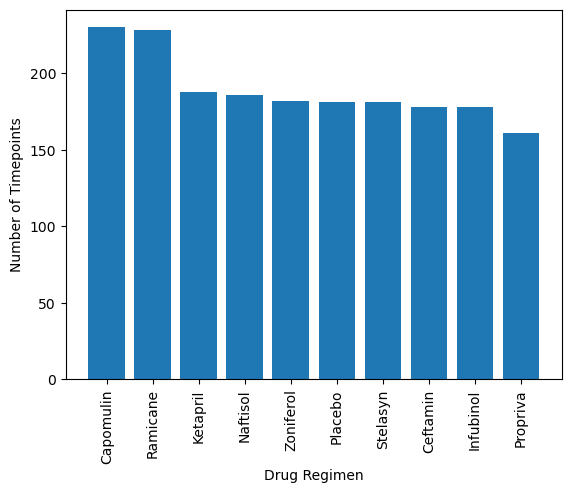

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False) # sorted values
plt.bar(timepoint_desc.index, timepoint_desc.values) # used pyplot function
plt.ylabel('Number of Timepoints', size=10) # define y label
plt.xlabel('Drug Regimen') # define x label
plt.xticks(rotation='vertical') # this is to rotate the x values
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct='%1.1f%%',figsize=(8,8), colors=["orange","blue"])
plt.show()




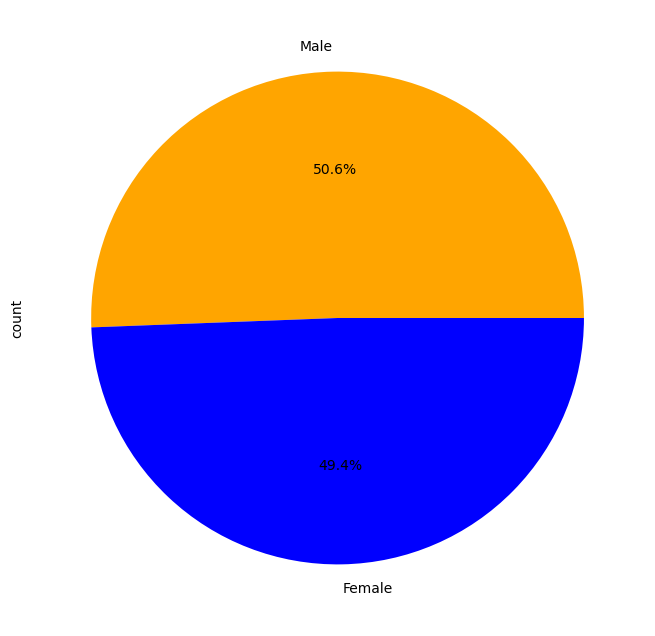

In [166]:
sex_df = clean_df["Sex"].value_counts()
sex_df.plot(kind="pie", autopct='%1.1f%%',figsize=(8,8), colors=["orange","blue"])
plt.show()

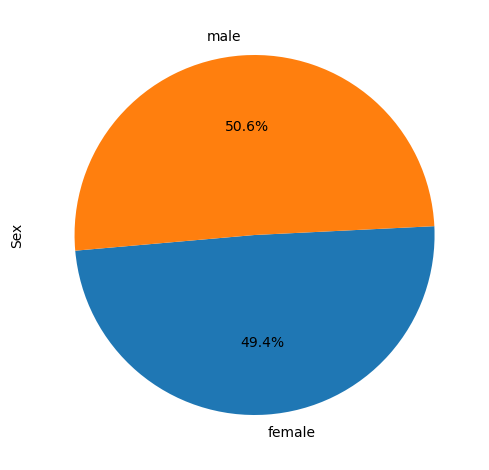

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex') # labeled the pie chart
plt.tight_layout() # used to make it look better
plt.show()


## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
# turned it into a dataframe for merging
last_tm_df = pd.DataFrame(last_tm) 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [136]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])

    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df



,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [137]:
# Determine outliers using upper and lower bounds
        # Could this be done with a for loop?
#calculations of quartile, quantile, etc for each of the drugs
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


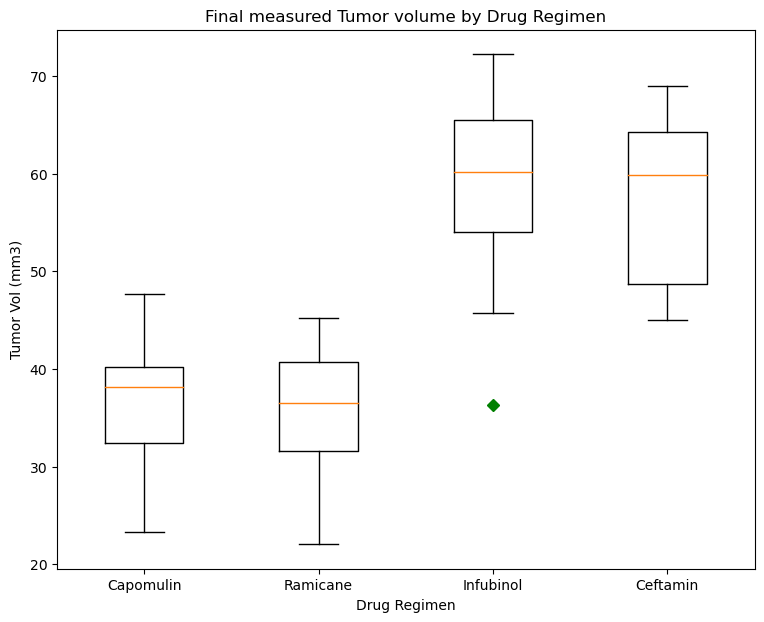

In [138]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Created a list to use for the boxplot. Each one list is a list of each drug tumor data. 
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

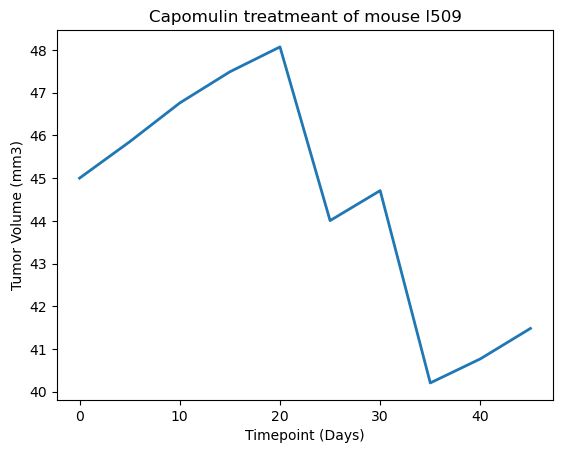

In [141]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# created a dataframe with specific mouse using the .loc() function and a boolean to find l509 data
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

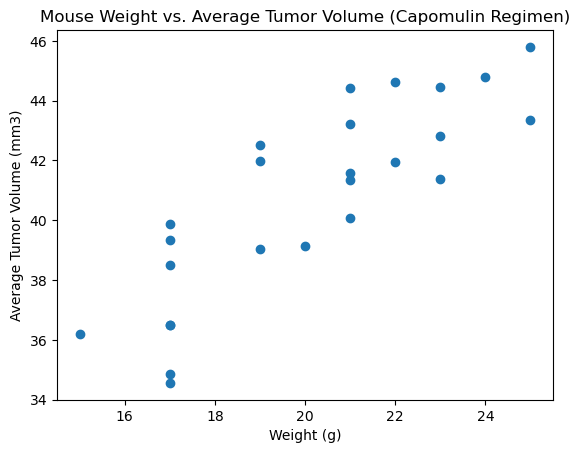

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only rows with 'Capomulin' as the drug regimen
cap_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by 'Mouse ID' and calculate the mean of 'Weight (g)' and 'Tumor Volume (mm3)'
capavg = cap_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.savefig('scatterplot.png')  # Save the plot as an image
plt.show()
capavg




## Correlation and Regression

In [168]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [169]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [170]:
# defined slope of regression line using the linregress results
# defined the y-intercept using the linregress results
slope = 0.9544396890241045
intercept = 21.552160532685015

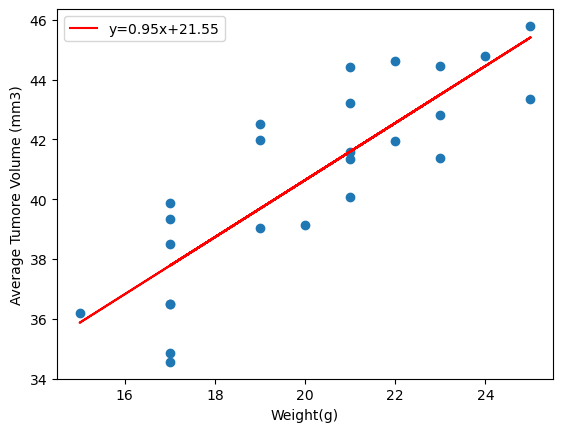

In [171]:
# ploting the regression line

# calculate the the linear line plot list of values
line = slope*(capavg['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.savefig('linearregression')
plt.show()